In [1]:
%matplotlib notebook

In [3]:
# Convenience Methods

import pickle

def safe_pickle_load(path):
    try:
        with open(path, 'rb') as f:
            d = pickle.load(f)
    except:
        with open(path, 'rb') as f:
            d = pickle.load(f, encoding='latin1')
    return d

<IPython.core.display.Javascript object>


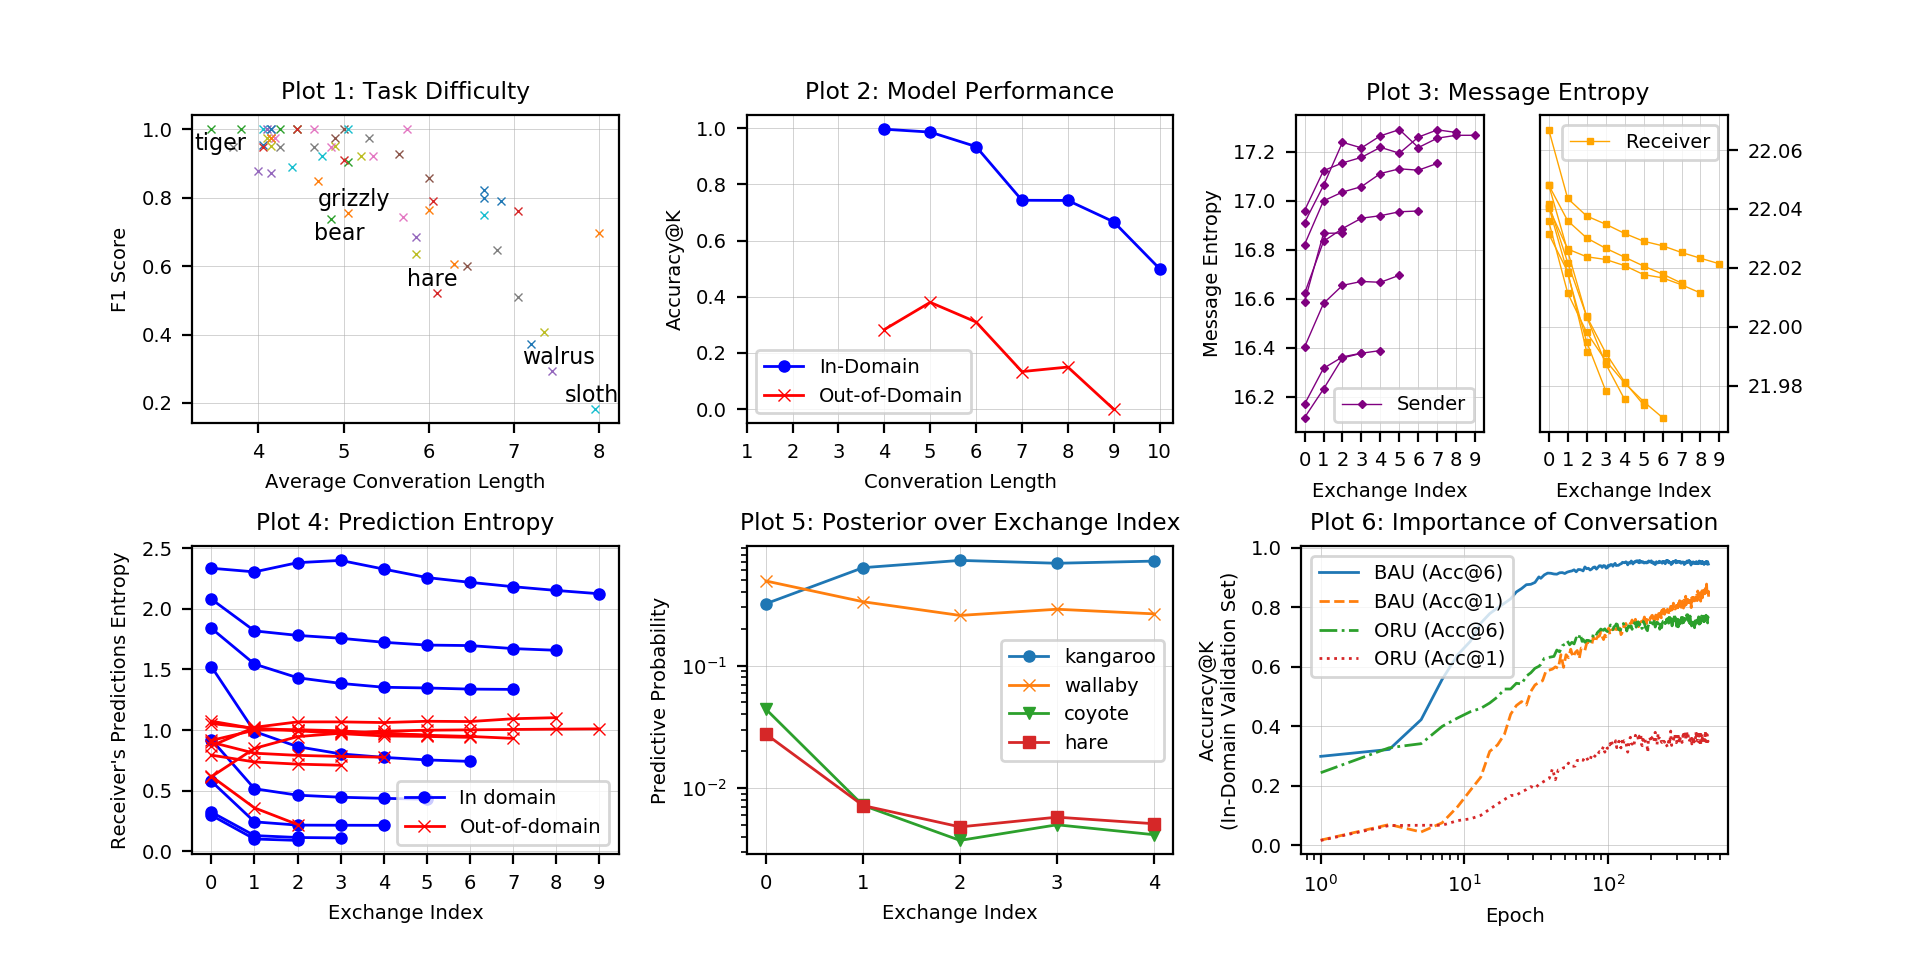

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 8*0.88})
mpl.rcParams.update({'lines.markersize': 4})

def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


scale = 0.8
fig = plt.figure(figsize=(12*scale, 6*scale))

gs = GridSpec(2, 3)
gs.update(left=0.1, right=0.9, hspace=0.4, wspace=0.3)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax4 = plt.subplot(gs[1, 0])
ax5 = plt.subplot(gs[1, 1])
ax6 = plt.subplot(gs[1, 2])

gs3 = GridSpec(2, 2)
gs3.update(left=0.675, right=0.9, bottom=0.55, wspace=0.3)
ax3 = plt.subplot(gs3[:, :])
ax3a = plt.subplot(gs3[:, 0])
ax3b = plt.subplot(gs3[:, 1])

# ax3a.plot([0, 1, 2], [3, 5, 4])

pos = ax3.get_position()

# Axis Labels

ax1.set_xlabel('Average Converation Length')
ax1.set_ylabel('F1 Score')
ax2.set_xlabel('Converation Length')
ax2.set_ylabel('Accuracy@K')

ax3a.set_xlabel('Exchange Index')
ax3b.set_xlabel('Exchange Index')
ax3a.set_ylabel('Message Entropy')

ax4.set_xlabel("Exchange Index")
ax4.set_ylabel("Receiver's Predictions Entropy")
ax5.set_xlabel("Exchange Index")
ax5.set_ylabel("Predictive Probability")
ax6.set_xlabel("Epoch")
ax6.set_ylabel("Accuracy@K\n(In-Domain Validation Set)")


# Ticks

ax3b.yaxis.tick_right()


# Titles

ax1.set_title('Plot 1: Task Difficulty')
ax2.set_title('Plot 2: Model Performance')
tC = fig.suptitle("Plot 3: Message Entropy", x=pos.x0 + 0.11, y=pos.y1 + 0.035)
ax4.set_title('Plot 4: Prediction Entropy')
ax5.set_title('Plot 5: Posterior over Exchange Index')
ax6.set_title('Plot 6: Importance of Conversation')


# Add Data


def plt1(ax, fontsize=20):
    fig1_toload = 'iclr-data/fig1.pickle'
    data = safe_pickle_load(fig1_toload)
    fig1_data_names = data['names']
    fig1_data_x = data['x']
    fig1_data_y = data['y']
    
    # ax.tick_params(labelsize=16)

    animals_to_show_above = ["hare", "walrus", "sloth", "grizzly"]
    animals_to_show_below = ["tiger",  'bear']

    for i, (x, y) in enumerate(zip(fig1_data_x, fig1_data_y)):
        ax.plot(x, y, 'x')
        # plt.xlabel("Average Conversation Length",fontsize=18)
        # plt.ylabel("F1 Score",fontsize=18)

        name = fig1_data_names[i]

        if name in animals_to_show_above:
            ax.text(x-0.35, y+0.02, name, fontsize=fontsize)
        if name in animals_to_show_below:
            ax.text(x-0.2, y-0.06, name, fontsize=fontsize)

    ax.grid()


def plt2(ax):
    fig2_data = safe_pickle_load('iclr-data/fig2.pickle')
    ax.grid()

    ax.plot(fig2_data['indomain_x'], fig2_data['indomain_y'], 'bo-', label='In-Domain')
    ax.plot(fig2_data['ood_x'], fig2_data['ood_y'], 'rx-', label='Out-of-Domain')

    ax.set_xticks(range(1,11))
    ax.legend(loc="best")


def plt3(axL, axR):
    fig3_data = safe_pickle_load('iclr-data/fig3.pickle')

    receiver_template = 'receiver_message_entropy_{}'
    sender_template = 'sender_message_entropy_{}'

    # Configure Matplotlib Display
    # mpl.rcParams.update({'font.size': 14})
    # mpl.rcParams.update({'lines.markersize': 5})

    ax = axL

    ax.grid('on')
    ax.set_xticks(range(10))

    for i in range(10):
        try:
            entropies = fig3_data[sender_template.format(i)]
            line_plot, = ax.plot(entropies, 'bD', linestyle='-', color='purple', label='Sender')
            ax.legend(handles=[line_plot])
        except:
            pass


    ax = axR

    ax.grid('on')
    ax.set_xticks(range(10))

    for i in range(10):
        try:
            entropies = fig3_data[receiver_template.format(i)]
            line_plot, = ax.plot(entropies, 'rs', linestyle='-', color='orange', label='Receiver')
            ax.legend(handles=[line_plot])
        except:
            pass

def plt4(ax):
    fig4_data = safe_pickle_load('iclr-data/fig4.pickle')
    
    indomain_template = 'indomain_{}'
    ood_template = 'out_of_domain_{}'

    # Configure Matplotlib Display
    # mpl.rcParams.update({'font.size': 14})
    # mpl.rcParams.update({'lines.markersize': 5})

    # Plot Receiver's Predictions Entropy
    ax.grid('on')
    ax.set_xticks
    ax.set_xticks(range(10))

    for i in range(10):
        try:
            entropies = fig4_data[indomain_template.format(i)]
            if i == 0:
                ax.plot(entropies, 'bo', linestyle='-', label="In domain")
            else:
                ax.plot(entropies, 'bo', linestyle='-')
        except:
            pass

    for i in range(10):
        try:
            entropies = fig4_data[ood_template.format(i)]
            if i == 0:
                ax.plot(entropies, 'rx', linestyle='-', label="Out-of-domain")
            else:
                ax.plot(entropies, 'rx', linestyle='-')
        except:
            pass

    ax.legend(loc='best')

def plt5(ax):
    fig5_path = 'iclr-data/fig5.pickle'
    fig5_data = safe_pickle_load(fig5_path)
    
    ax.grid()

    # mpl.rcParams.update({'lines.markersize': 12})

    markers = ['o', 'x', 'v', 's']

    for i, k in enumerate(sorted(fig5_data.keys(), key=lambda x: x.split('_')[-1])):
        x, y = fig5_data[k]
        correct, pred, idx = k.split('_')
        ax.plot(x, y, label=pred, marker=markers[i])

    ax.set_yscale('log')
    # ax.legend(loc='best', fontsize=12)
    ax.legend(loc='best')

def plt6(ax):
    fig6_path = 'iclr-data/fig6.pickle'
    fig6_data = safe_pickle_load(fig6_path)
    
    handles = []

    # K=6

    # Plot Baseline
    x, y = fig6_data['bau_6']
    h, = ax.plot(x, y, label='BAU (Acc@6)', linestyle='-')
    handles.append(h)

    # Plot Baseline
    x, y = fig6_data['bau_1']
    h, = ax.plot(x, y, label='BAU (Acc@1)', linestyle='--')
    handles.append(h)

    # Plot Frozen Sender
    x, y = fig6_data['oru_6']
    h, = ax.plot(x, y, label='ORU (Acc@6)', linestyle='-.')
    handles.append(h)

    # Plot Frozen Sender
    x, y = fig6_data['oru_1']
    h, = ax.plot(x, y, label='ORU (Acc@1)', linestyle=':')
    handles.append(h)

    # K=1

    ax.legend(handles=handles, loc='best')

    ax.grid('on')
    ax.set_xscale('log')

    
mpl.rcParams.update({'grid.linewidth': 0.2})
mpl.rcParams.update({'lines.linewidth': 1})
mpl.rcParams.update({'lines.markeredgewidth': 0.5})
mpl.rcParams.update({'lines.markersize': 3})
# ax1.tick_params(labelsize=4)
plt1(ax1, 8)
mpl.rcParams.update({'lines.markersize': 4})
plt2(ax2)
mpl.rcParams.update({'lines.linewidth': 0.5})
mpl.rcParams.update({'lines.markersize': 2})
plt3(ax3a, ax3b)
mpl.rcParams.update({'lines.linewidth': 1})
mpl.rcParams.update({'lines.markersize': 4})
plt4(ax4)
plt5(ax5)
plt6(ax6)

plt.savefig("poster_figures.pdf", format='pdf', dpi=300)
plt.show()

In [6]:
# print(mpl.rcParams.keys())

_ = """
KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which': 'major',
          'axes.hold': None,
          'axes.labelcolor': 'k',
          'axes.labelpad': 4.0,
          'axes.labelsize': 'medium',
          'axes.labelweight': 'normal',
          'axes.linewidth': 0.8,
          'axes.prop_cycle': cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
          'axes.spines.bottom': True,
          'axes.spines.left': True,
          'axes.spines.right': True,
          'axes.spines.top': True,
          'axes.titlepad': 6.0,
          'axes.titlesize': 'large',
          'axes.titleweight': 'normal',
          'axes.unicode_minus': True,
          'axes.xmargin': 0.05,
          'axes.ymargin': 0.05,
          'axes3d.grid': True,
          'backend': 'nbAgg',
          'backend.qt4': 'PyQt4',
          'backend.qt5': 'PyQt5',
          'backend_fallback': True,
          'boxplot.bootstrap': None,
          'boxplot.boxprops.color': 'k',
          'boxplot.boxprops.linestyle': '-',
          'boxplot.boxprops.linewidth': 1.0,
          'boxplot.capprops.color': 'k',
          'boxplot.capprops.linestyle': '-',
          'boxplot.capprops.linewidth': 1.0,
          'boxplot.flierprops.color': 'k',
          'boxplot.flierprops.linestyle': 'none',
          'boxplot.flierprops.linewidth': 1.0,
          'boxplot.flierprops.marker': 'o',
          'boxplot.flierprops.markeredgecolor': 'k',
          'boxplot.flierprops.markerfacecolor': 'none',
          'boxplot.flierprops.markersize': 6.0,
          'boxplot.meanline': False,
          'boxplot.meanprops.color': 'C2',
          'boxplot.meanprops.linestyle': '--',
          'boxplot.meanprops.linewidth': 1.0,
          'boxplot.meanprops.marker': '^',
          'boxplot.meanprops.markeredgecolor': 'C2',
          'boxplot.meanprops.markerfacecolor': 'C2',
          'boxplot.meanprops.markersize': 6.0,
          'boxplot.medianprops.color': 'C1',
          'boxplot.medianprops.linestyle': '-',
          'boxplot.medianprops.linewidth': 1.0,
          'boxplot.notch': False,
          'boxplot.patchartist': False,
          'boxplot.showbox': True,
          'boxplot.showcaps': True,
          'boxplot.showfliers': True,
          'boxplot.showmeans': False,
          'boxplot.vertical': True,
          'boxplot.whiskerprops.color': 'k',
          'boxplot.whiskerprops.linestyle': '-',
          'boxplot.whiskerprops.linewidth': 1.0,
          'boxplot.whiskers': 1.5,
          'contour.corner_mask': True,
          'contour.negative_linestyle': 'dashed',
          'datapath': '/Users/adrozdov/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data',
          'date.autoformatter.day': '%Y-%m-%d',
          'date.autoformatter.hour': '%m-%d %H',
          'date.autoformatter.microsecond': '%M:%S.%f',
          'date.autoformatter.minute': '%d %H:%M',
          'date.autoformatter.month': '%Y-%m',
          'date.autoformatter.second': '%H:%M:%S',
          'date.autoformatter.year': '%Y',
          'docstring.hardcopy': False,
          'errorbar.capsize': 0.0,
          'examples.directory': '',
          'figure.autolayout': False,
          'figure.dpi': 100.0,
          'figure.edgecolor': 'w',
          'figure.facecolor': 'w',
          'figure.figsize': [6.4, 4.8],
          'figure.frameon': True,
          'figure.max_open_warning': 20,
          'figure.subplot.bottom': 0.11,
          'figure.subplot.hspace': 0.2,
          'figure.subplot.left': 0.125,
          'figure.subplot.right': 0.9,
          'figure.subplot.top': 0.88,
          'figure.subplot.wspace': 0.2,
          'figure.titlesize': 'large',
          'figure.titleweight': 'normal',
          'font.cursive': ['Apple Chancery',
                           'Textile',
                           'Zapf Chancery',
                           'Sand',
                           'Script MT',
                           'Felipa',
                           'cursive'],
          'font.family': ['sans-serif'],
          'font.fantasy': ['Comic Sans MS',
                           'Chicago',
                           'Charcoal',
                           'ImpactWestern',
                           'Humor Sans',
                           'xkcd',
                           'fantasy'],
          'font.monospace': ['DejaVu Sans Mono',
                             'Bitstream Vera Sans Mono',
                             'Computer Modern Typewriter',
                             'Andale Mono',
                             'Nimbus Mono L',
                             'Courier New',
                             'Courier',
                             'Fixed',
                             'Terminal',
                             'monospace'],
          'font.sans-serif': ['DejaVu Sans',
                              'Bitstream Vera Sans',
                              'Computer Modern Sans Serif',
                              'Lucida Grande',
                              'Verdana',
                              'Geneva',
                              'Lucid',
                              'Arial',
                              'Helvetica',
                              'Avant Garde',
                              'sans-serif'],
          'font.serif': ['DejaVu Serif',
                         'Bitstream Vera Serif',
                         'Computer Modern Roman',
                         'New Century Schoolbook',
                         'Century Schoolbook L',
                         'Utopia',
                         'ITC Bookman',
                         'Bookman',
                         'Nimbus Roman No9 L',
                         'Times New Roman',
                         'Times',
                         'Palatino',
                         'Charter',
                         'serif'],
          'font.size': 7.04,
          'font.stretch': 'normal',
          'font.style': 'normal',
          'font.variant': 'normal',
          'font.weight': 'normal',
          'grid.alpha': 1.0,
          'grid.color': '#b0b0b0',
          'grid.linestyle': '-',
          'grid.linewidth': 0.8,
          'hatch.color': 'k',
          'hatch.linewidth': 1.0,
          'hist.bins': 10,
          'image.aspect': 'equal',
          'image.cmap': 'viridis',
          'image.composite_image': True,
          'image.interpolation': 'nearest',
          'image.lut': 256,
          'image.origin': 'upper',
          'image.resample': True,
          'interactive': True,
          'keymap.all_axes': ['a'],
          'keymap.back': ['left', 'c', 'backspace'],
          'keymap.forward': ['right', 'v'],
          'keymap.fullscreen': ['f', 'ctrl+f'],
          'keymap.grid': ['g'],
          'keymap.grid_minor': ['G'],
          'keymap.home': ['h', 'r', 'home'],
          'keymap.pan': ['p'],
          'keymap.quit': ['ctrl+w', 'cmd+w', 'q'],
          'keymap.quit_all': ['W', 'cmd+W', 'Q'],
          'keymap.save': ['s', 'ctrl+s'],
          'keymap.xscale': ['k', 'L'],
          'keymap.yscale': ['l'],
          'keymap.zoom': ['o'],
          'legend.borderaxespad': 0.5,
          'legend.borderpad': 0.4,
          'legend.columnspacing': 2.0,
          'legend.edgecolor': '0.8',
          'legend.facecolor': 'inherit',
          'legend.fancybox': True,
          'legend.fontsize': 'medium',
          'legend.framealpha': 0.8,
          'legend.frameon': True,
          'legend.handleheight': 0.7,
          'legend.handlelength': 2.0,
          'legend.handletextpad': 0.8,
          'legend.labelspacing': 0.5,
          'legend.loc': 'best',
          'legend.markerscale': 1.0,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'legend.shadow': False,
          'lines.antialiased': True,
          'lines.color': 'C0',
          'lines.dash_capstyle': 'butt',
          'lines.dash_joinstyle': 'round',
          'lines.dashdot_pattern': [6.4, 1.6, 1.0, 1.6],
          'lines.dashed_pattern': [3.7, 1.6],
          'lines.dotted_pattern': [1.0, 1.65],
          'lines.linestyle': '-',
          'lines.linewidth': 1.5,
          'lines.marker': 'None',
          'lines.markeredgewidth': 1.0,
          'lines.markersize': 4.0,
          'lines.scale_dashes': True,
          'lines.solid_capstyle': 'projecting',
          'lines.solid_joinstyle': 'round',
          'markers.fillstyle': 'full',
          'mathtext.bf': 'sans:bold',
          'mathtext.cal': 'cursive',
          'mathtext.default': 'it',
          'mathtext.fallback_to_cm': True,
          'mathtext.fontset': 'dejavusans',
          'mathtext.it': 'sans:italic',
          'mathtext.rm': 'sans',
          'mathtext.sf': 'sans',
          'mathtext.tt': 'monospace',
          'nbagg.transparent': True,
          'patch.antialiased': True,
          'patch.edgecolor': 'k',
          'patch.facecolor': 'C0',
          'patch.force_edgecolor': False,
          'patch.linewidth': 1.0,
          'path.effects': [],
          'path.simplify': True,
          'path.simplify_threshold': 0.1111111111111111,
          'path.sketch': None,
          'path.snap': True,
          'pdf.compression': 6,
          'pdf.fonttype': 3,
          'pdf.inheritcolor': False,
          'pdf.use14corefonts': False,
          'pgf.debug': False,
          'pgf.preamble': [],
          'pgf.rcfonts': True,
          'pgf.texsystem': 'xelatex',
          'plugins.directory': '.matplotlib_plugins',
          'polaraxes.grid': True,
          'ps.distiller.res': 6000,
          'ps.fonttype': 3,
          'ps.papersize': 'letter',
          'ps.useafm': False,
          'ps.usedistiller': False,
          'savefig.bbox': None,
          'savefig.directory': '~',
          'savefig.dpi': 'figure',
          'savefig.edgecolor': 'w',
          'savefig.facecolor': 'w',
          'savefig.format': 'png',
          'savefig.frameon': True,
          'savefig.jpeg_quality': 95,
          'savefig.orientation': 'portrait',
          'savefig.pad_inches': 0.1,
          'savefig.transparent': False,
          'scatter.marker': 'o',
          'svg.fonttype': 'path',
          'svg.hashsalt': None,
          'svg.image_inline': True,
          'text.antialiased': True,
          'text.color': 'k',
          'text.hinting': 'auto',
          'text.hinting_factor': 8,
          'text.latex.preamble': [],
          'text.latex.preview': False,
          'text.latex.unicode': False,
          'text.usetex': False,
          'timezone': 'UTC',
          'tk.window_focus': False,
          'toolbar': 'toolbar2',
          'verbose.fileo': 'sys.stdout',
          'verbose.level': 'silent',
          'webagg.open_in_browser': True,
          'webagg.port': 8988,
          'webagg.port_retries': 50,
          'xtick.alignment': 'center',
          'xtick.bottom': True,
          'xtick.color': 'k',
          'xtick.direction': 'out',
          'xtick.labelsize': 'medium',
          'xtick.major.bottom': True,
          'xtick.major.pad': 3.5,
          'xtick.major.size': 3.5,
          'xtick.major.top': True,
          'xtick.major.width': 0.8,
          'xtick.minor.bottom': True,
          'xtick.minor.pad': 3.4,
          'xtick.minor.size': 2.0,
          'xtick.minor.top': True,
          'xtick.minor.visible': False,
          'xtick.minor.width': 0.6,
          'xtick.top': False,
          'ytick.alignment': 'center_baseline',
          'ytick.color': 'k',
          'ytick.direction': 'out',
          'ytick.labelsize': 'medium',
          'ytick.left': True,
          'ytick.major.left': True,
          'ytick.major.pad': 3.5,
          'ytick.major.right': True,
          'ytick.major.size': 3.5,
          'ytick.major.width': 0.8,
          'ytick.minor.left': True,
          'ytick.minor.pad': 3.4,
          'ytick.minor.right': True,
          'ytick.minor.size': 2.0,
          'ytick.minor.visible': False,
          'ytick.minor.width': 0.6,
          'ytick.right': False}))
"""